In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
!unzip -qq /content/drive/My\ Drive/'[AOP:딥러닝 인공지능]'/'TEST'/'1. [Tensorflow 2.0 과 Pytorch]'/'3. 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch'/'3. dataset'/'mnist_png.zip'


In [12]:
glob('/content/mnist_png/training/0/*.png') #경로가 포함된 파일 이름을 리스트로 가져옴. 레이블 0에 속한 모든 이미지를 불러옵니다.

['/content/mnist_png/training/0/27841.png',
 '/content/mnist_png/training/0/52928.png',
 '/content/mnist_png/training/0/22364.png',
 '/content/mnist_png/training/0/4756.png',
 '/content/mnist_png/training/0/47957.png',
 '/content/mnist_png/training/0/46944.png',
 '/content/mnist_png/training/0/38411.png',
 '/content/mnist_png/training/0/53255.png',
 '/content/mnist_png/training/0/5905.png',
 '/content/mnist_png/training/0/26178.png',
 '/content/mnist_png/training/0/43727.png',
 '/content/mnist_png/training/0/6663.png',
 '/content/mnist_png/training/0/29074.png',
 '/content/mnist_png/training/0/15890.png',
 '/content/mnist_png/training/0/10488.png',
 '/content/mnist_png/training/0/46371.png',
 '/content/mnist_png/training/0/23589.png',
 '/content/mnist_png/training/0/47241.png',
 '/content/mnist_png/training/0/22757.png',
 '/content/mnist_png/training/0/45596.png',
 '/content/mnist_png/training/0/28946.png',
 '/content/mnist_png/training/0/21314.png',
 '/content/mnist_png/training/0/69.

In [13]:
data_paths = glob('/content/mnist_png/training/*/*.png')

In [14]:
data_paths[-1] # 잘 불러왔는지 확인

'/content/mnist_png/training/4/23269.png'

In [15]:
len(data_paths)

60000

In [17]:
path = data_paths[0]  # 예제로 사용할 데이터 추출

In [18]:
path

'/content/mnist_png/training/6/52788.png'

# 데이터 분석 (MNIST)

In [23]:
os.listdir('/content/mnist_png/training')

['6', '0', '1', '2', '3', '5', '8', '7', '9', '4']

In [21]:
len(os.listdir('/content/mnist_png/training'))

10

In [22]:
label_nums = os.listdir('/content/mnist_png/training')
label_nums

['6', '0', '1', '2', '3', '5', '8', '7', '9', '4']

In [24]:
label_nums.sort() # 강의 실습환경과 동일하게 맞춰줌.

In [25]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

## **데이터별 갯수 비교**

In [31]:
nums_dataset = []

for lbl_n in label_nums:
  data_per_class = os.listdir('/content/mnist_png/training/' + lbl_n)
  nums_dataset.append(len(data_per_class))

In [29]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

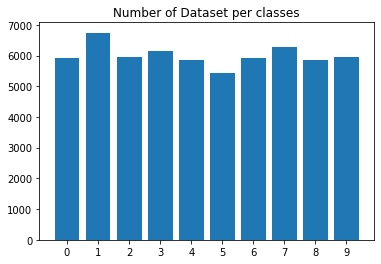

In [30]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per classes')
plt.show()

# Pillow로 열기

In [32]:
path # 정렬하기 전에 추출된 예시데이터이기 때문에 강의에서는 0/1.PNG 이지만, 여기서는 임의추출된 6/52788.PNG  .- 실습에 문제 없음.

'/content/mnist_png/training/6/52788.png'

In [33]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [34]:
image.shape

(28, 28)

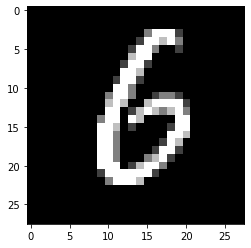

In [35]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [36]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [37]:
image.shape # 출력값 : [28, 28, 1] -> 채널이 들어가 있음. 3차원 default

TensorShape([28, 28, 1])

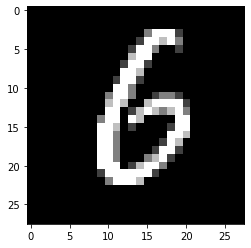

In [39]:
#plt.imshow(image, 'gray') -> typeError. 채널이 들어가 있기 때문에 채널을 0으로 맞추고 출력해줘야함
plt.imshow(image[:,:,0], 'gray')
plt.show()

# Label 얻기

In [40]:
path

'/content/mnist_png/training/6/52788.png'

In [41]:
path.split('/')

['', 'content', 'mnist_png', 'training', '6', '52788.png']

In [42]:
path.split('/')[-2]

'6'

In [45]:
type(path.split('/')[-2])

str

In [46]:
def get_label(path):
  class_name = path.split('/')[-2]
  label = int(class_name)
  return label

In [47]:
path, get_label(path)

('/content/mnist_png/training/6/52788.png', 6)

# 데이터 이미지 사이즈 알기

In [48]:
from tqdm import tqdm_notebook

In [49]:
heights = []
widths = []

In [50]:
data_paths[:10]

['/content/mnist_png/training/6/52788.png',
 '/content/mnist_png/training/6/48886.png',
 '/content/mnist_png/training/6/29370.png',
 '/content/mnist_png/training/6/21290.png',
 '/content/mnist_png/training/6/22869.png',
 '/content/mnist_png/training/6/24146.png',
 '/content/mnist_png/training/6/7717.png',
 '/content/mnist_png/training/6/56441.png',
 '/content/mnist_png/training/6/4934.png',
 '/content/mnist_png/training/6/8009.png']

In [51]:
len(data_paths)

60000

In [52]:
image.shape

TensorShape([28, 28, 1])

In [53]:
img_pil = Image.open(path)
image = np.array(img_pil)
image.shape

(28, 28)

In [54]:
h, w = image.shape

In [56]:
#for path in data_paths:  --> 데이터 추출량이 많기 때문에 진행과정을 시각화해보면 좋음.
for path in tqdm_notebook(data_paths):
  img_pil = Image.open(path)
  image = np.array(image_pil)
  h, w = image.shape

  heights.append(h)
  widths.append(w)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [57]:
np.unique(heights)

array([28])

In [58]:
np.unique(widths)

array([28])

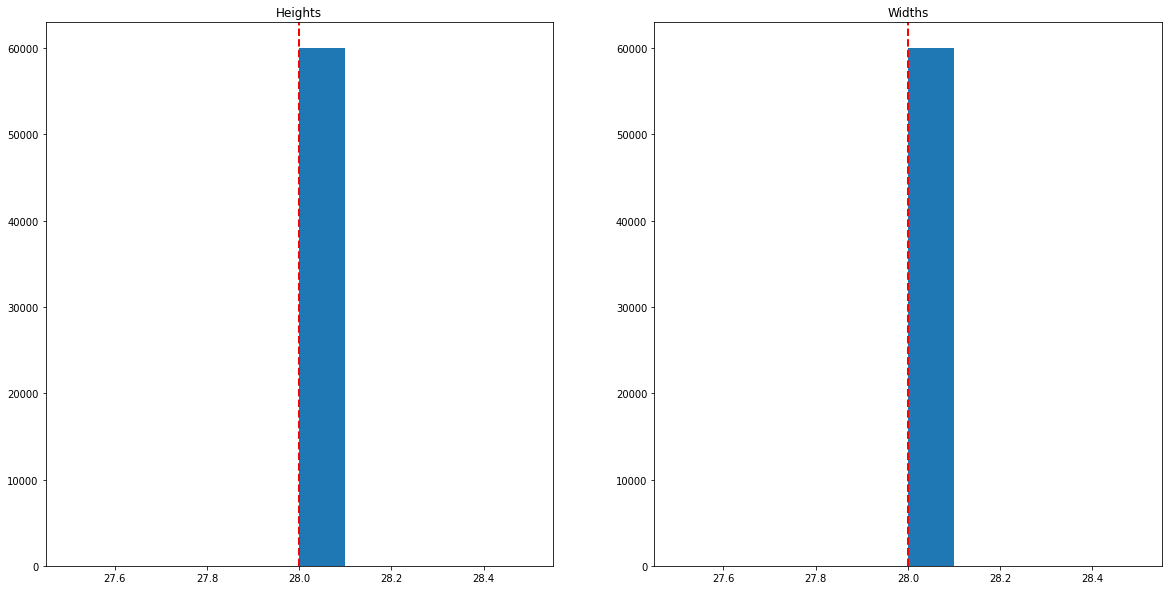

In [61]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle = 'dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(heights), color='r', linestyle = 'dashed', linewidth=2)

plt.show()